#CIFAR-10:

Model: MLP (Multilayer Precepton) neural network model.

Aim: To build a MLP supervised classification model with Keras.


About CIFAR-10 Dataset:

Detail description will be available at http://www.cs.utoronto.ca/~kriz/cifar.html

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

The dataset is divided into five training batches and one test batch, each with 10000 images. 

The test batch contains exactly 1000 randomly-selected images from each class. 

The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. 

Between them, the training batches contain exactly 5000 images from each class

In [1]:
# Getting CIFAR-10 Dataset

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [0]:
# Split CIFAR-10 dataset into Training and Testing sets

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [0]:
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [5]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
#model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=30,
                    verbose=1,
                    #validation_split=0.20)
                    validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 17s 347us/step - loss: 1.6270 - acc: 0.4195 - val_loss: 1.7031 - val_acc: 0.3908
Epoch 2/30
50000/50000 [==============================] - 17s 346us/step - loss: 1.5775 - acc: 0.4375 - val_loss: 1.6990 - val_acc: 0.4065
Epoch 3/30
50000/50000 [==============================] - 17s 346us/step - loss: 1.5350 - acc: 0.4528 - val_loss: 1.6494 - val_acc: 0.4146
Epoch 4/30
50000/50000 [==============================] - 17s 348us/step - loss: 1.4979 - acc: 0.4668 - val_loss: 1.5646 - val_acc: 0.4432
Epoch 5/30
50000/50000 [==============================] - 18s 367us/step - loss: 1.4674 - acc: 0.4791 - val_loss: 1.5086 - val_acc: 0.4650
Epoch 6/30
50000/50000 [==============================] - 17s 346us/step - loss: 1.4384 - acc: 0.4886 - val_loss: 1.6246 - val_acc: 0.4270
Epoch 7/30
50000/50000 [==============================] - 17s 347us/step - loss: 1.4142 - acc: 0.4983 - val_loss: 1.

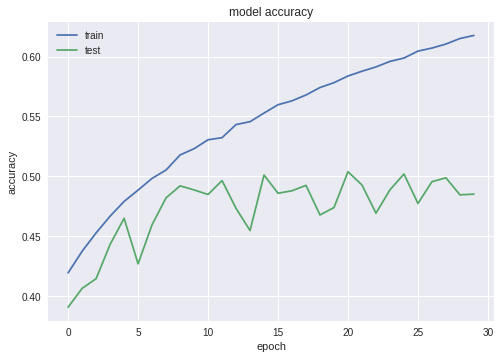

In [16]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()